In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Raisin.csv")
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
X = data[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]]
Y = data[["Class"]].Class
Y_ = []
for i in range(len(Y)):
    if Y[i] == "Kecimen":
        Y_.append(0)
    else:
        Y_.append(1)
Y = Y_
# X

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1172, stratify=Y)

0.7481481481481481 0.8518518518518519 0.9439252336448598 0.8347107438016529
[[129   6]
 [ 34 101]]


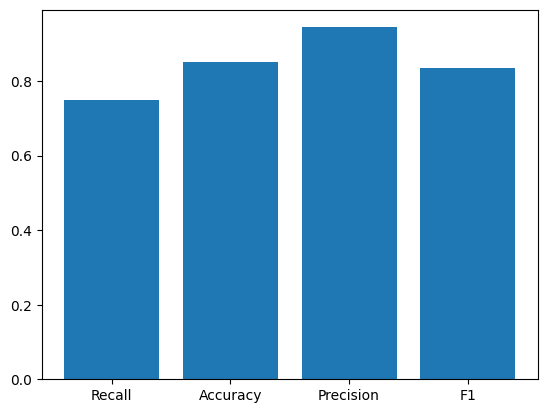

In [7]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
nb_accuracy = metrics.accuracy_score(Y_test, Y_pred)
nb_recall = metrics.recall_score(Y_test, Y_pred)
nb_prec = metrics.precision_score(Y_test, Y_pred)
nb_f1 = metrics.f1_score(Y_test, Y_pred)
print(nb_recall, nb_accuracy, nb_prec, nb_f1)
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
plt.bar(["Recall", "Accuracy", "Precision", "F1"], [nb_recall, nb_accuracy, nb_prec, nb_f1])
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

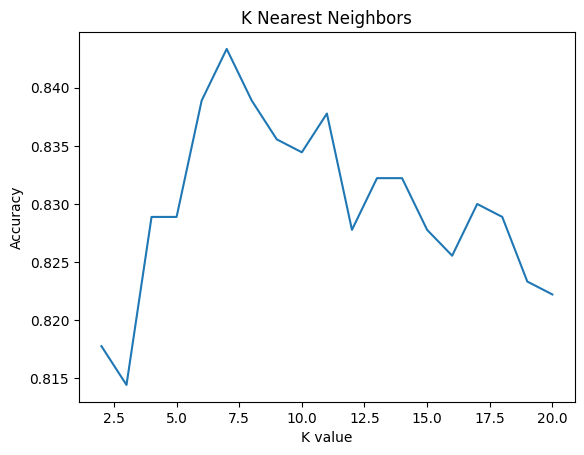

In [9]:
knn_score = []
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X, Y)
    score = cross_val_score(knn_classifier, X, Y, cv = 10)
    knn_score.append(score.mean())
plt.plot([i for i in range(2, 21)], knn_score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K Nearest Neighbors")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors = knn_score.index(max(knn_score)) + 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_accuracy = metrics.accuracy_score(Y_pred, Y_test)
knn_accuracy

0.8481481481481481